# Jefferson Gómez Herrera - 2201293 - Métodos matemáticos para la física 2
## Códigos con los cuales se realizó la asignación 1: Calentamiento

In [10]:
import numpy as np              # Se importan las librerías necesarias
from numpy.fft import fft
from numpy import cos, pi,sin
import matplotlib.pyplot as plt
import random


### Se comienza por definir y graficar las señales, encontrar sus transformadas de Fourier analítica y discreta y graficarlas.

Text(0, 0.5, 'y')

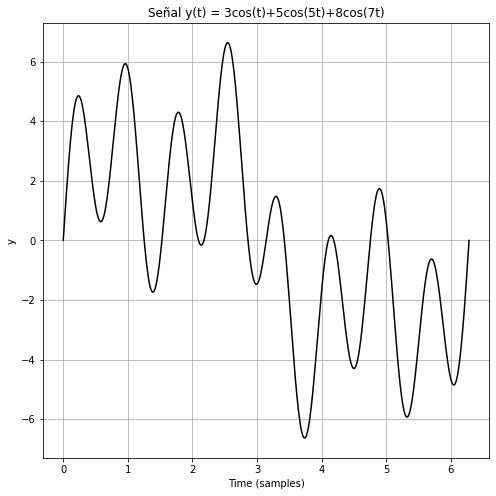

In [2]:
N = 500;  # Número de datos de la señal
T = 2*pi  # Periodo
h = T/N;  # Paso de t
w_1 = 1;  # Frecuencia fundamental

#k = np.linspace(0,10,500); 
n = np.linspace(0,N,500); 
t = np.linspace(0,T,N); 

w_n = []; #Frecuencias 

for i in n:
    w = i*w_1;
    w_n.append(w)

y_k = [];  # Valores de la función y

for i in t:
    y = 3*sin(i) + 2*sin(3*i) + 3*sin(8*i); #Forma de calcular los valores de la función y.
    y_k.append(y);


plt.figure(figsize=(8,8))

# Plot de la señal asumiendo w = 1

plt.grid()
plt.plot(t,y_k,'-k') 
#plt.xlim(0,N)
plt.title('Señal y(t) = 3cos(t)+5cos(5t)+8cos(7t)')
plt.xlabel('Time (samples)') 
plt.ylabel('y')

In [3]:
# Define función que calcula la transformada de Fourier discreta. 
# Tomada del libro Python Programming and Numerical Methods - A Guide for Engineers and Scientists por Q. Kong; T. Siauw; A. Bayen

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X



(0.47207295421331724-9.383682029481134j)


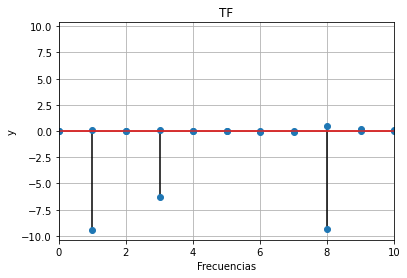

In [4]:
Y = h*DFT(y_k) # Datos de la función transfromada  

plt.grid()
plt.stem(w_n,Y.real,'-ok', use_line_collection=True)
plt.stem(w_n,Y.imag,'-ok', use_line_collection=True)
plt.xlim(0,10)
plt.title('TF')
plt.xlabel('Frecuencias') 
plt.ylabel('y')

print(Y[8])

Text(0, 0.5, 'Y')

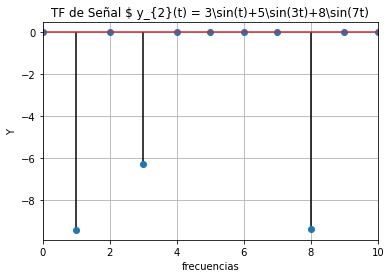

In [5]:
# Transformada analítica
# Se calculó usando Matlab, pues me fue imposible hacerlo en python.

Y_analitic = np.array([0,-9.429267,0,-6.277626,0,0,0,0,-9.383682,0,0])
w = np.array([0,1,2,3,4,5,6,7,8,9,10]) # frecuencia
plt.stem(w,Y_analitic,'-ok', use_line_collection=True)
plt.grid()
plt.xlim(0,10)
plt.title('TF de Señal $ y_{2}(t) = 3\sin(t)+5\sin(3t)+8\sin(7t)')
plt.xlabel('frecuencias') 
plt.ylabel('Y')

Text(0, 0.5, '$ |Y|^{2}$')

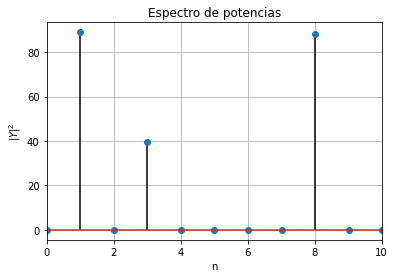

In [6]:
# Espectro de potencias

Y_espectro = abs(Y.imag)**2

plt.grid()
plt.stem(w_n,Y_espectro,'-ok', use_line_collection=True)
#plt.stem(w_n,Y.imag,'-ok', use_line_collection=True)
plt.xlim(0,10)
plt.title('Espectro de potencias')
plt.xlabel('n') 
plt.ylabel(r'$ |Y|^{2}$')

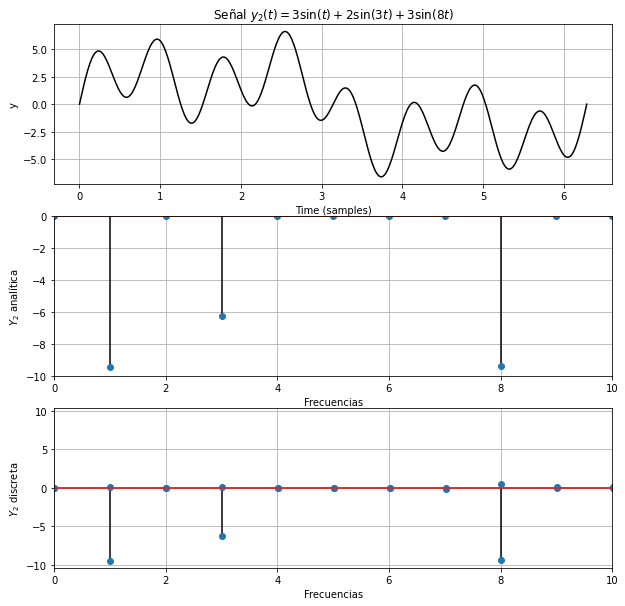

In [7]:
plt.figure(figsize=(10,10));
# Gráfico de la señal
plt.subplot(3,1,1)
plt.plot(t,y_k,'-k') 
plt.grid();
plt.title('Señal $y_{2}(t) = 3\sin(t)+2\sin(3t)+3\sin(8t)$')
plt.xlabel('Time (samples)') 
plt.ylabel('y')
# Gráfico transformada de Fourier analítica
plt.subplot(3,1,2)
plt.stem(w,Y_analitic,'-ok', use_line_collection=True)
plt.grid();
plt.xlim(0,10)
plt.ylim(-10,0)
plt.xlabel('Frecuencias') 
plt.ylabel('$Y_{2}$ analítica')
# Gráfico transformada de Fourier discreta
plt.subplot(3,1,3)
plt.stem(w_n,Y.imag,'-ok', use_line_collection=True)
plt.stem(w_n,Y.real,'-ok', use_line_collection=True)
plt.grid();
plt.xlim(0,10)
plt.xlabel('Frecuencias') 
plt.ylabel('$ Y_{2} $ discreta')

plt.show()


### A partir de aquí se juega con el tiempo de medición T = Nh


Text(0, 0.5, 'y')

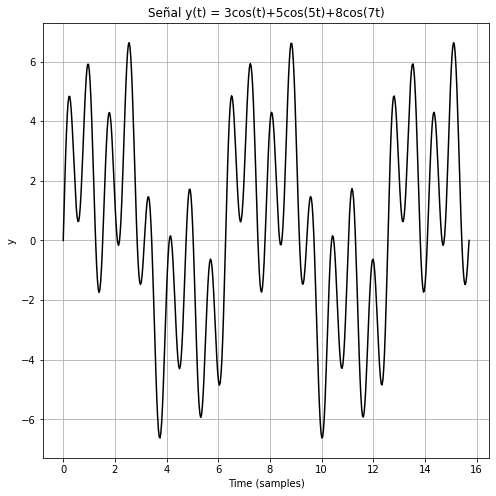

In [8]:
# Experimente los efectos de elegir diferentes valores del tamaño de
#paso h y de ampliar el período de medición T = Nh.

N_modificacion = 500;  # Número de datos de la señal
T_modificacion = 5*pi  # Periodo
h_modificacion = T_modificacion/N_modificacion;  # Paso de t
w_1 = 1;  # Frecuencia fundamental

#k = np.linspace(0,10,500); 
n_modificacion = np.linspace(0,N_modificacion,N_modificacion); 
t_modificacion = np.linspace(0,T_modificacion,N_modificacion); 

w_n_modificacion = []; #Frecuencias 

for i in n_modificacion:
    w = i*w_1;
    w_n_modificacion.append(w)

y_k_modificacion = [];  # Valores de la función y

for i in t_modificacion:
    y = 3*sin(i) + 2*sin(3*i) + 3*sin(8*i); #Forma de calcular los valores de la función y.
    y_k_modificacion.append(y);


plt.figure(figsize=(8,8))

# Plot de la señal asumiendo w = 1

plt.grid()
plt.plot(t_modificacion,y_k_modificacion,'-k') 
#plt.xlim(0,N)
plt.title('Señal y(t) = 3cos(t)+5cos(5t)+8cos(7t)')
plt.xlabel('Time (samples)') 
plt.ylabel('y')

Text(0, 0.5, 'Y')

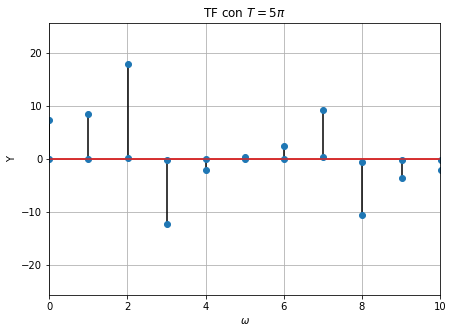

In [9]:
Y_modificacion = h_modificacion*DFT(y_k_modificacion)  # Transformada de la función luego de aplicarsele modificaciones a T.
 
plt.figure(figsize=(7,5))
plt.grid()
plt.stem(w_n_modificacion,Y_modificacion.real,'-ok', use_line_collection=True)
plt.stem(w_n_modificacion,Y_modificacion.imag,'-ok', use_line_collection=True)
plt.xlim(0,10)
#plt.ylim(0,75)
plt.title('TF con $T=5\pi$')
plt.xlabel('$\omega$') 
plt.ylabel('Y')


## A partir de aquí se considera el análisis de la señal con ruido

Text(0, 0.5, 'y')

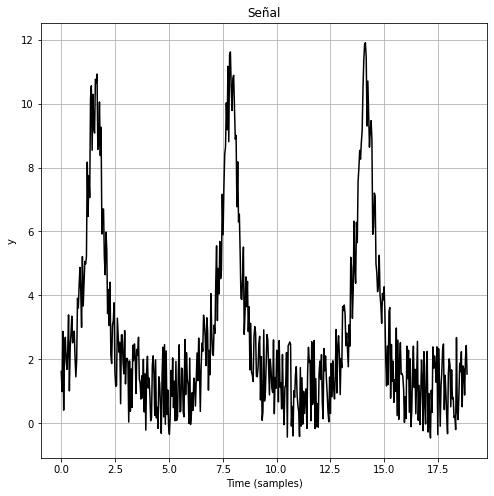

In [12]:
# Señal ruidosa
T = 6*pi   #Periodo de la función
N2 = 500;  # Número de puntos que se toman para la función
t1 = np.linspace(0,T,N2);
h = T / N2 # Paso del tiempo
A = 1;  # Parámetro de control de ruido
n = np.linspace(0,N2,500);

w_n = []; #Frecuencias 

for i in n:
    w = i*1;
    w_n.append(w)


Numero_aleatorio = [];

for i in range(500):
    Numero_aleatorio.append(random.random());

y_Ruido = [];  # Valores de la señal donde el parámetro de control de ruido es A

for i,j in zip(t1,Numero_aleatorio):     # La función zip() permite recorrer dos listas a la vez
    y1 = 10/(10-9*sin(i)) + A*(3*j - 1); #Forma de calcular los valores de la función y.
    y_Ruido.append(y1);
    
plt.figure(figsize=(8,8))
plt.grid()
plt.plot(t1,y_Ruido,'-k') 
plt.title('Señal')
plt.xlabel('Time (samples)') 
plt.ylabel('y')

Text(0, 0.5, 'Y')

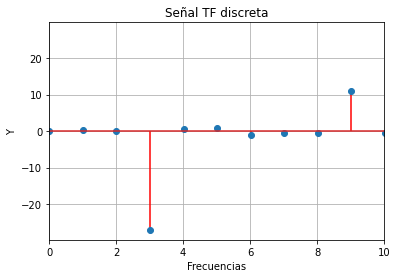

In [13]:
Y_TF_Ruido = h*DFT(y_Ruido);


plt.grid()
#plt.stem(w_n,Y_TF_Ruido.real,'-ok',use_line_collection=True)
plt.stem(w_n,Y_TF_Ruido.imag,'-r',use_line_collection=True)
plt.xlim(0,10)
plt.title('Señal TF discreta')
plt.xlabel('Frecuencias') 
plt.ylabel('Y')

Text(0, 0.5, 'Y')

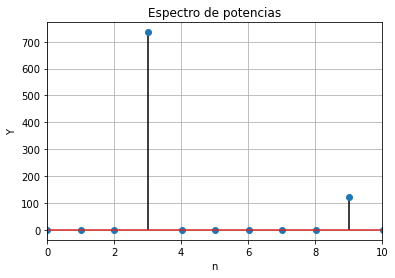

In [14]:
#Espectro de potencias 
Y_espectro = abs(Y_TF_Ruido.imag)**2;

plt.grid()
plt.stem(w_n,Y_espectro,'-ok',use_line_collection=True)
#plt.stem(w_n,Y_TF_Ruido.imag,'-r')
plt.xlim(0,10)
plt.title('Espectro de potencias')
plt.xlabel('n') 
plt.ylabel('Y')

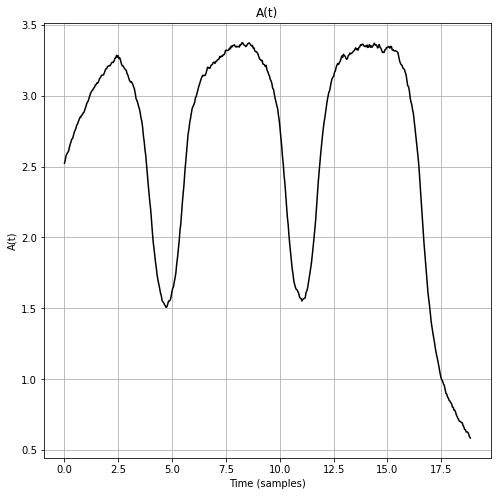

In [15]:
# Función de autocorrelación y su TF
from scipy import signal

corr = signal.correlate(y_Ruido, np.ones(128), mode='same') / 128  # Probablemente aquí se encuentra el error que dificulta la
                                                                   # correcta realización del análisis de la función de 
                                                                   # autocorrelación.

plt.figure(figsize=(8,8))
plt.grid()
plt.plot(t1,corr,'-k') 
plt.title('A(t)')
plt.xlabel('Time (samples)') 
plt.ylabel('A(t)')

TF_corr = h*DFT(corr)

Text(0, 0.5, 'A')

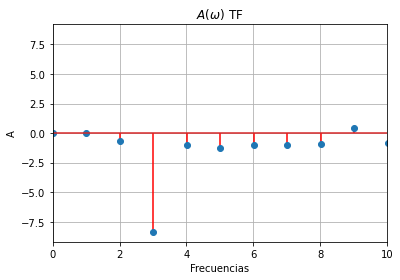

In [16]:
plt.grid()
#plt.stem(w_n,Y_TF_Ruido.real,'-ok',use_line_collection=True)
plt.stem(w_n,TF_corr.imag,'-r',use_line_collection=True)
plt.xlim(0,10)
#plt.ylim(-1500,500)
plt.title('$A(\omega)$ TF')
plt.xlabel('Frecuencias') 
plt.ylabel('A')